# Step 3: Fitting and Evaluating Different Models
We want to test a bunch of different models on our data to see which is best for classification.
1. KNN
2. Decision Tree
3. Random Forest
4. Bagged Trees
5. AdaBoost
6. Gradient Boost
7. Multinomial Naive Bayes
8. Support Vector Machine (+ PCA!)

In [50]:
import pandas as pd

In [51]:
x = pd.read_csv('cleaned-data.csv').drop('Unnamed: 0', axis=1)
x.head()

,aa,abandon,ability,able,abort,abroad,absolute,absolutely,absorb,abstract,...,young,younger,youth,yr,za,zero,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
posts = pd.read_csv('arts-programming-reddit-posts.csv')
y = posts.label

TRAIN TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## K Neighbors

In [55]:
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [56]:
#Create a classifier
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
knn_runtime = time.time() - start

In [57]:
knn_pred = knn_classifier.predict(x_test)

In [58]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, knn_pred)

Precision Score: 0.6316933105696104
Recall Score: 0.9635416666666666
Accuracy Score: 0.6991666666666667
F1 Score: 0.7631011530889659


In [59]:
#Find optimal f1 score
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [60]:
# find_best_k(x_train, y_train, x_test, y_test)

## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

In [62]:
# Train a DT classifier
start = time.time()
dt_classifier = DecisionTreeClassifier()  
dt_classifier.fit(x_train, y_train) 
dt_runtime = time.time() - start

In [63]:
# Make predictions for test data
dt_pred = dt_classifier.predict(x_test)  

In [64]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, dt_pred)

Precision Score: 0.9058548009367682
Recall Score: 0.915719696969697
Accuracy Score: 0.9097619047619048
F1 Score: 0.9107605368495408


## Random Forest

In [65]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [66]:
start = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)
rf_runtime = time.time() - start

In [67]:
# Make predictions for test data
rf_pred = rf_classifier.predict(x_test)  

In [68]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, rf_pred)

Precision Score: 0.96045197740113
Recall Score: 0.9659090909090909
Accuracy Score: 0.9628571428571429
F1 Score: 0.9631728045325778


## Bagged Trees

In [69]:
start = time.time()
bt_classifier = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=100)
bt_classifier.fit(x_train, y_train)
bt_runtime = time.time() - start

In [70]:
bt_pred = bt_classifier.predict(x_test)

In [71]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, bt_pred)

Precision Score: 0.9418518518518518
Recall Score: 0.6020359848484849
Accuracy Score: 0.7811904761904762
F1 Score: 0.7345465049104563


## Gradient Boosting & AdaBoost

In [72]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [73]:
start = time.time()
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(x_train, y_train)
ab_runtime = time.time() - start

In [74]:
start = time.time()
gbt_clf = GradientBoostingClassifier()
gbt_clf.fit(x_train, y_train)
gb_runtime = time.time() - start

In [75]:
adaboost_test_preds = adaboost_clf.predict(x_test)
gbt_clf_test_preds = gbt_clf.predict(x_test)

In [76]:
print_metrics(y_test, adaboost_test_preds)

Precision Score: 0.9586242565296095
Recall Score: 0.8776041666666666
Accuracy Score: 0.919404761904762
F1 Score: 0.9163267828451366


In [77]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.9659969088098919
Recall Score: 0.8877840909090909
Accuracy Score: 0.9278571428571428
F1 Score: 0.9252405625462621


In [78]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[4016,  160],
       [ 517, 3707]])

In [79]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[4044,  132],
       [ 474, 3750]])

### Visualizing Data in 2, 3 dimensions

In [80]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(x)
x2_pca = pca2.transform(x)
x2_pca = pd.DataFrame(x2_pca)

pca3 = PCA(n_components=3)
pca3.fit(x)
x3_pca = pca3.transform(x)
x3_pca = pd.DataFrame(x3_pca)

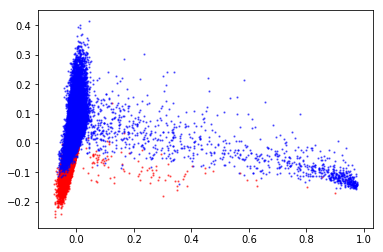

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x2_pca[0][:21000], x2_pca[1][:21000], s=1.5, alpha = 0.5, c = 'red')
plt.scatter(x2_pca[0][21001:], x2_pca[1][21001:], s=1.5, alpha = 0.5, c = 'blue')

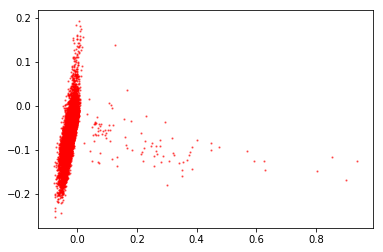

In [82]:
plt.scatter(x2_pca[0][:21000], x2_pca[1][:21000], s=1.5, alpha = 0.5, c = 'red')

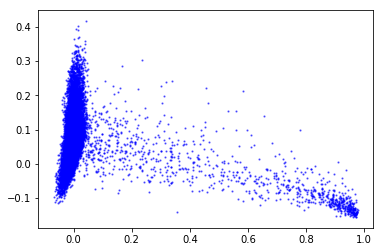

In [83]:
plt.scatter(x2_pca[0][21001:], x2_pca[1][21001:], s=1.5, alpha = 0.5, c = 'blue')

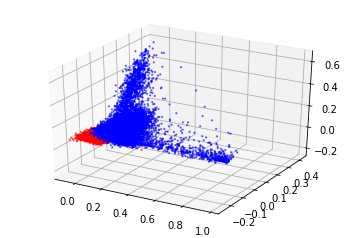

In [84]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3_pca[0][:21000], x3_pca[1][:21000], x3_pca[2][:21000], s=1.5, alpha = 0.5, c = 'red')
ax.scatter(x3_pca[0][21001:], x3_pca[1][21001:], x3_pca[2][21001:], s=1.5, alpha = 0.5, c = 'blue')

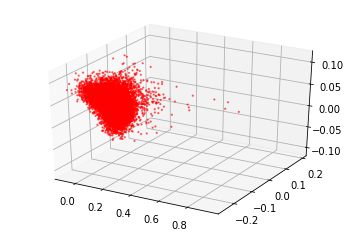

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3_pca[0][:21000], x3_pca[1][:21000], x3_pca[2][:21000], s=1.5, alpha = 0.5, c = 'red')

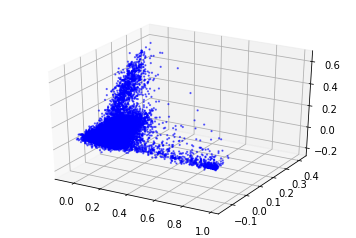

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3_pca[0][21001:], x3_pca[1][21001:], x3_pca[2][21001:], s=1.5, alpha = 0.5, c = 'blue')

## Support Vector Machine

### Reducing Dimensionality from 4910 to 50 with PCA
Because of the complexity of SVM, we reduce the number of features using **Principle Component Analysis**.

In [87]:
pca = PCA(n_components=50)

In [88]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
x_pca = pca.transform(x)
x_pca

array([[-0.01869496, -0.04855872, -0.03986648, ...,  0.00226897,
        -0.02971498,  0.0094011 ],
       [-0.01065057, -0.01378798, -0.02721456, ..., -0.03927898,
        -0.01609789, -0.02325503],
       [-0.01120753, -0.04872945, -0.01223453, ...,  0.01160026,
        -0.04735267,  0.01402618],
       ...,
       [ 0.01472221,  0.05453401, -0.09266692, ...,  0.00898333,
        -0.01392473,  0.02763312],
       [ 0.01790304,  0.03178509, -0.07332966, ...,  0.01622005,
         0.01303041,  0.02024502],
       [ 0.17785845,  0.03056077, -0.08870443, ...,  0.06460936,
        -0.01767558,  0.01515295]])

### Training the SVM Model on PCA Features
Here we perform a train-test-split on the PCA features:

In [90]:
from sklearn import svm

In [91]:
svm_train, svm_test, svmy_train, svmy_test = train_test_split(x_pca, y, test_size = 0.2)

In [92]:
start = time.time()
svm_clf = svm.NuSVC(kernel='linear')
svm_clf.fit(svm_train, svmy_train)
svm_runtime = time.time() - start
svm_runtime

101.07372403144836

In [93]:
svm_pred = svm_clf.predict(svm_test)

In [94]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

print_metrics(svmy_test, svm_pred)

Precision Score: 0.9708118714741232
Recall Score: 0.9282363977485929
Accuracy Score: 0.9494047619047619
F1 Score: 0.9490468768732766


In [95]:
pd.crosstab(svmy_test, svm_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,4017,119,4136
1,306,3958,4264
All,4323,4077,8400


In [96]:
pca.explained_variance_.sum()

0.12730714986242395

Despite the PCA features only explaining 12.7% of the variance in data, we still get an F1-score of 95%!

## Multinomial Naive Bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
start = time.time()
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_runtime = time.time() - start
mnb_runtime


1.5799050331115723

In [101]:
mnb_pred = mnb.predict(x_test)

In [102]:
pd.crosstab(y_test, mnb_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,4048,128,4176
1,104,4120,4224
All,4152,4248,8400


In [127]:
results = pd.DataFrame()

In [105]:
def evaluate(test, pred, model):
    return [model, precision_score(test, pred), recall_score(test, pred), accuracy_score(test, pred), f1_score(test, pred)]

In [106]:
a = evaluate(y_test, knn_pred, 'K Nearest Neighbors')

In [107]:
b = evaluate(y_test, dt_pred, 'Decision Tree')

In [108]:
c = evaluate(y_test, rf_pred, 'Random Forest')

In [109]:
d = evaluate(y_test, bt_pred, 'Bagged Trees')

In [110]:
e = evaluate(y_test, adaboost_test_preds, 'AdaBoost Classifier')

In [111]:
f = evaluate(y_test, gbt_clf_test_preds, 'Gradient Boosting Classifier')

In [112]:
g = evaluate(y_test, mnb_pred, 'Multinomial Naive Bayes')

In [126]:
h = evaluate(svmy_test, svm_pred, 'Support Vector Machine')

In [128]:
results = results.append([a, b, c, d, e, f, g, h])
results

,0,1,2,3,4
0,K Nearest Neighbors,0.631693,0.963542,0.699167,0.763101
1,Decision Tree,0.905855,0.915720,0.909762,0.910761
2,Random Forest,0.960452,0.965909,0.962857,0.963173
3,Bagged Trees,0.941852,0.602036,0.781190,0.734547
4,AdaBoost Classifier,0.958624,0.877604,0.919405,0.916327
5,Gradient Boosting Classifier,0.965997,0.887784,0.927857,0.925241
6,Multinomial Naive Bayes,0.969868,0.975379,0.972381,0.972616
7,Support Vector Machine,0.970812,0.928236,0.949405,0.949047


In [129]:
results.columns = ['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'F1 Score']

In [130]:
results

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score
0,K Nearest Neighbors,0.631693,0.963542,0.699167,0.763101
1,Decision Tree,0.905855,0.915720,0.909762,0.910761
2,Random Forest,0.960452,0.965909,0.962857,0.963173
3,Bagged Trees,0.941852,0.602036,0.781190,0.734547
4,AdaBoost Classifier,0.958624,0.877604,0.919405,0.916327
5,Gradient Boosting Classifier,0.965997,0.887784,0.927857,0.925241
6,Multinomial Naive Bayes,0.969868,0.975379,0.972381,0.972616
7,Support Vector Machine,0.970812,0.928236,0.949405,0.949047


In [131]:
results['Model Runtime'] = [knn_runtime, dt_runtime, rf_runtime, bt_runtime, ab_runtime, gb_runtime, mnb_runtime, svm_runtime]
results

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score,Model Runtime
0,K Nearest Neighbors,0.631693,0.963542,0.699167,0.763101,37.884273
1,Decision Tree,0.905855,0.915720,0.909762,0.910761,147.961347
2,Random Forest,0.960452,0.965909,0.962857,0.963173,87.280363
3,Bagged Trees,0.941852,0.602036,0.781190,0.734547,473.444739
4,AdaBoost Classifier,0.958624,0.877604,0.919405,0.916327,48.820199
5,Gradient Boosting Classifier,0.965997,0.887784,0.927857,0.925241,314.398123
6,Multinomial Naive Bayes,0.969868,0.975379,0.972381,0.972616,1.579905
7,Support Vector Machine,0.970812,0.928236,0.949405,0.949047,101.073724
